### Content

### Section 1: Data preparation

**Input the dataset and complete a basic sorting out.**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
rating_type = pd.CategoricalDtype(
    categories=['Failed', 'Failing', 'Critical', 'Serious', 'Poor', 'Fair', 
                'Satisfactory', 'Good', 'Very Good', 'Excellent', 'NA'], 
    ordered=True)

scour_type = pd.CategoricalDtype(
    categories=['Unknown', 'Critical','Unstable', 'Stable', 'Protected', 'Dry', 'No waterway'], 
    ordered=True)

types_dict = { 'Structure_id': str, 'District':'category', 'Toll':'category', 
              'Maintainer':'category', 'Urban':'category', 'Status':'category', 
              'Historic':'category', 'Service_under':'category', 'Material':'category', 
              'Design':'category', 
              'Deck_rating':rating_type, 'Superstr_rating':rating_type, 'Substr_rating':rating_type, 
              'Scour_rating':scour_type}

bridges = pd.read_csv('tx19_bridges_sample.csv', dtype = types_dict, index_col = 'Structure_id')
bridges  

,District,Detour_Km,Toll,Maintainer,Urban,Status,Year,Lanes_on,Lanes_under,AverageDaily,...,Spans,Length,Width,Deck_rating,Superstr_rating,Substr_rating,Rated_load,Trucks_percent,Scour_rating,Future_traffic
Structure_id,,,,,,,,,,,,,,,,,,,,,
000021521-00101,District2,199,Free,Agency,Rural,Local,2005,1,0,1,...,2,31.4,4.3,Good,Very Good,Very Good,41.7,0.0,Dry,1
000021521-00181,District2,199,Free,Agency,Rural,Local,2005,1,0,1,...,1,15.5,4.3,Good,Good,Very Good,41.7,0.0,Dry,1
000021521-TMP20,District2,199,Free,Agency,Rural,Local,2012,2,0,100,...,1,10.1,8.4,Very Good,Very Good,Very Good,48.1,0.0,Dry,150
000021525-00012,District2,199,Free,Agency,Rural,Local,1950,1,0,80,...,14,45.4,3.7,Good,Good,Poor,10.0,0.0,Dry,120
000021580-00092,District2,6,Free,Agency,Rural,Local,2004,2,0,150,...,1,25.0,7.3,Good,Very Good,Very Good,37.2,4.0,Dry,200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
DAPFORHOO000012,District9,0,Free,Military,Urban,Local,1994,3,0,300,...,3,45.4,19.0,Good,Good,Good,64.3,40.0,No waterway,600
DAPFORHOO000013,District9,0,Free,Military,Urban,Local,2000,2,0,300,...,1,12.3,10.8,Good,Good,Good,35.1,40.0,No waterway,600
DAPFORHOO000015,District9,0,Free,Military,Urban,Minor,1996,2,7,1200,...,4,73.2,9.8,Good,Good,Good,24.5,25.0,No waterway,1500


#### Section 1.A. Derive an age variable

In [3]:
with_age = bridges.assign(Age = 2021-bridges.Year)
with_age

,District,Detour_Km,Toll,Maintainer,Urban,Status,Year,Lanes_on,Lanes_under,AverageDaily,...,Length,Width,Deck_rating,Superstr_rating,Substr_rating,Rated_load,Trucks_percent,Scour_rating,Future_traffic,Age
Structure_id,,,,,,,,,,,,,,,,,,,,,
000021521-00101,District2,199,Free,Agency,Rural,Local,2005,1,0,1,...,31.4,4.3,Good,Very Good,Very Good,41.7,0.0,Dry,1,16
000021521-00181,District2,199,Free,Agency,Rural,Local,2005,1,0,1,...,15.5,4.3,Good,Good,Very Good,41.7,0.0,Dry,1,16
000021521-TMP20,District2,199,Free,Agency,Rural,Local,2012,2,0,100,...,10.1,8.4,Very Good,Very Good,Very Good,48.1,0.0,Dry,150,9
000021525-00012,District2,199,Free,Agency,Rural,Local,1950,1,0,80,...,45.4,3.7,Good,Good,Poor,10.0,0.0,Dry,120,71
000021580-00092,District2,6,Free,Agency,Rural,Local,2004,2,0,150,...,25.0,7.3,Good,Very Good,Very Good,37.2,4.0,Dry,200,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
DAPFORHOO000012,District9,0,Free,Military,Urban,Local,1994,3,0,300,...,45.4,19.0,Good,Good,Good,64.3,40.0,No waterway,600,27
DAPFORHOO000013,District9,0,Free,Military,Urban,Local,2000,2,0,300,...,12.3,10.8,Good,Good,Good,35.1,40.0,No waterway,600,21
DAPFORHOO000015,District9,0,Free,Military,Urban,Minor,1996,2,7,1200,...,73.2,9.8,Good,Good,Good,24.5,25.0,No waterway,1500,25


#### Section 1.B. Exclude very old bridges

In [4]:
Modern_bridge = with_age.loc[with_age.Historic == 'Not historic'] 
Modern_bridge

,District,Detour_Km,Toll,Maintainer,Urban,Status,Year,Lanes_on,Lanes_under,AverageDaily,...,Length,Width,Deck_rating,Superstr_rating,Substr_rating,Rated_load,Trucks_percent,Scour_rating,Future_traffic,Age
Structure_id,,,,,,,,,,,,,,,,,,,,,
000021521-00101,District2,199,Free,Agency,Rural,Local,2005,1,0,1,...,31.4,4.3,Good,Very Good,Very Good,41.7,0.0,Dry,1,16
000021521-00181,District2,199,Free,Agency,Rural,Local,2005,1,0,1,...,15.5,4.3,Good,Good,Very Good,41.7,0.0,Dry,1,16
000021521-TMP20,District2,199,Free,Agency,Rural,Local,2012,2,0,100,...,10.1,8.4,Very Good,Very Good,Very Good,48.1,0.0,Dry,150,9
000021525-00012,District2,199,Free,Agency,Rural,Local,1950,1,0,80,...,45.4,3.7,Good,Good,Poor,10.0,0.0,Dry,120,71
000021580-00092,District2,6,Free,Agency,Rural,Local,2004,2,0,150,...,25.0,7.3,Good,Very Good,Very Good,37.2,4.0,Dry,200,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
DAPFORHOO000012,District9,0,Free,Military,Urban,Local,1994,3,0,300,...,45.4,19.0,Good,Good,Good,64.3,40.0,No waterway,600,27
DAPFORHOO000013,District9,0,Free,Military,Urban,Local,2000,2,0,300,...,12.3,10.8,Good,Good,Good,35.1,40.0,No waterway,600,21
DAPFORHOO000015,District9,0,Free,Military,Urban,Minor,1996,2,7,1200,...,73.2,9.8,Good,Good,Good,24.5,25.0,No waterway,1500,25


#### Section 1.C. Reduce the number of categories of materials and design

**Firstly, the categories of materials are sorted.**

In [5]:
Modern_bridge.Material.value_counts()

Concrete    15985
Steel        3534
Timber        352
Other          40
Masonry         1
Name: Material, dtype: int64

**From above code, we may find out that the masonry one is very rare, so I decide to merge it into the 'other'.**

In [6]:
simp_rating_type = pd.CategoricalDtype(categories=['Other', 'Steel', 'Timber', 'Concrete'])
simp_d = {'Masonry':'Other'}

def simMat(row):
    if row.Material in simp_d:
        return simp_d[row.Material]
    return row.Material
        
cate_mat = Modern_bridge.assign(Material_sorted = Modern_bridge.apply(simMat, axis=1))
cate_mat = cate_mat.astype({'Material_sorted':simp_rating_type})
cate_mat

,District,Detour_Km,Toll,Maintainer,Urban,Status,Year,Lanes_on,Lanes_under,AverageDaily,...,Width,Deck_rating,Superstr_rating,Substr_rating,Rated_load,Trucks_percent,Scour_rating,Future_traffic,Age,Material_sorted
Structure_id,,,,,,,,,,,,,,,,,,,,,
000021521-00101,District2,199,Free,Agency,Rural,Local,2005,1,0,1,...,4.3,Good,Very Good,Very Good,41.7,0.0,Dry,1,16,Concrete
000021521-00181,District2,199,Free,Agency,Rural,Local,2005,1,0,1,...,4.3,Good,Good,Very Good,41.7,0.0,Dry,1,16,Concrete
000021521-TMP20,District2,199,Free,Agency,Rural,Local,2012,2,0,100,...,8.4,Very Good,Very Good,Very Good,48.1,0.0,Dry,150,9,Concrete
000021525-00012,District2,199,Free,Agency,Rural,Local,1950,1,0,80,...,3.7,Good,Good,Poor,10.0,0.0,Dry,120,71,Timber
000021580-00092,District2,6,Free,Agency,Rural,Local,2004,2,0,150,...,7.3,Good,Very Good,Very Good,37.2,4.0,Dry,200,17,Concrete
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
DAPFORHOO000012,District9,0,Free,Military,Urban,Local,1994,3,0,300,...,19.0,Good,Good,Good,64.3,40.0,No waterway,600,27,Concrete
DAPFORHOO000013,District9,0,Free,Military,Urban,Local,2000,2,0,300,...,10.8,Good,Good,Good,35.1,40.0,No waterway,600,21,Concrete
DAPFORHOO000015,District9,0,Free,Military,Urban,Minor,1996,2,7,1200,...,9.8,Good,Good,Good,24.5,25.0,No waterway,1500,25,Concrete


**Then, it turns to catogories of the design.**

In [7]:
cate_mat.Design.value_counts()

Beam          17743
Slab           1045
Other           996
Arch             79
Frame            26
Truss            13
Movable           7
Suspension        3
Name: Design, dtype: int64

**According to this table, I tend to allocate all these five types with an 'Other' ('Frame', 'Truss', 'Movable' and 'Suspension').**

In [8]:
def class_des(j):
        if (j == 'Frame' ): return 'Other'
        if (j == 'Truss' ): return 'Other'
        if (j == 'Movable' ): return 'Other'
        if (j == 'Suspension' ): return 'Other'
        return j

cate_mat_and_des = cate_mat.copy()
cate_mat_and_des.Design = cate_mat.Design.apply(class_des)

cate_mat_and_des.Design.value_counts()

Beam     17743
Slab      1045
Other     1045
Arch        79
Name: Design, dtype: int64

#### Section 1.D. Calculate current condition

**Give different statements with ordered score.**

In [9]:
def calcu_con(k):
    if (k == 'Excellent'): return 9
    if (k == 'Very Good'): return 8    
    if (k == 'Good'): return 7
    if (k == 'Satisfactory'): return 6
    if (k == 'Fair'): return 5
    if (k == 'Poor'): return 4
    if (k == 'Serious'): return 3
    if (k == 'Critical'): return 2
    if (k == 'Failing'): return 1
    return 0

**Sum up three values and name as 'Current_condition'**

In [10]:
current_con = cate_mat_and_des.assign(Current_condition = cate_mat_and_des.Deck_rating.apply(calcu_con) + cate_mat_and_des.Superstr_rating.apply(calcu_con) + cate_mat_and_des.Substr_rating.apply(calcu_con))
current_con

,District,Detour_Km,Toll,Maintainer,Urban,Status,Year,Lanes_on,Lanes_under,AverageDaily,...,Deck_rating,Superstr_rating,Substr_rating,Rated_load,Trucks_percent,Scour_rating,Future_traffic,Age,Material_sorted,Current_condition
Structure_id,,,,,,,,,,,,,,,,,,,,,
000021521-00101,District2,199,Free,Agency,Rural,Local,2005,1,0,1,...,Good,Very Good,Very Good,41.7,0.0,Dry,1,16,Concrete,23.0
000021521-00181,District2,199,Free,Agency,Rural,Local,2005,1,0,1,...,Good,Good,Very Good,41.7,0.0,Dry,1,16,Concrete,22.0
000021521-TMP20,District2,199,Free,Agency,Rural,Local,2012,2,0,100,...,Very Good,Very Good,Very Good,48.1,0.0,Dry,150,9,Concrete,24.0
000021525-00012,District2,199,Free,Agency,Rural,Local,1950,1,0,80,...,Good,Good,Poor,10.0,0.0,Dry,120,71,Timber,18.0
000021580-00092,District2,6,Free,Agency,Rural,Local,2004,2,0,150,...,Good,Very Good,Very Good,37.2,4.0,Dry,200,17,Concrete,23.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
DAPFORHOO000012,District9,0,Free,Military,Urban,Local,1994,3,0,300,...,Good,Good,Good,64.3,40.0,No waterway,600,27,Concrete,21.0
DAPFORHOO000013,District9,0,Free,Military,Urban,Local,2000,2,0,300,...,Good,Good,Good,35.1,40.0,No waterway,600,21,Concrete,21.0
DAPFORHOO000015,District9,0,Free,Military,Urban,Minor,1996,2,7,1200,...,Good,Good,Good,24.5,25.0,No waterway,1500,25,Concrete,21.0


### Section 2: Exploratory Analysis

#### Section 2.A. Explore the relationship

**First of all, make the data more distinct and wipe off some outliers (condition-score is less than 5) .**

In [11]:
bridge_sorted = current_con.loc[current_con.Current_condition>5,['AverageDaily','Trucks_percent', 'Material_sorted', 'Design','Age','Current_condition']]
bridge_sorted

,AverageDaily,Trucks_percent,Material_sorted,Design,Age,Current_condition
Structure_id,,,,,,
000021521-00101,1,0.0,Concrete,Slab,16,23.0
000021521-00181,1,0.0,Concrete,Slab,16,22.0
000021521-TMP20,100,0.0,Concrete,Beam,9,24.0
000021525-00012,80,0.0,Timber,Beam,71,18.0
000021580-00092,150,4.0,Concrete,Beam,17,23.0
...,...,...,...,...,...,...
DAPFORHOO000012,300,40.0,Concrete,Beam,27,21.0
DAPFORHOO000013,300,40.0,Concrete,Beam,21,21.0
DAPFORHOO000015,1200,25.0,Concrete,Beam,25,21.0


**Then, we will start from the relation between continuous predictors and categorical predictors.**

<AxesSubplot:title={'center':'Age'}, xlabel='Material_sorted'>

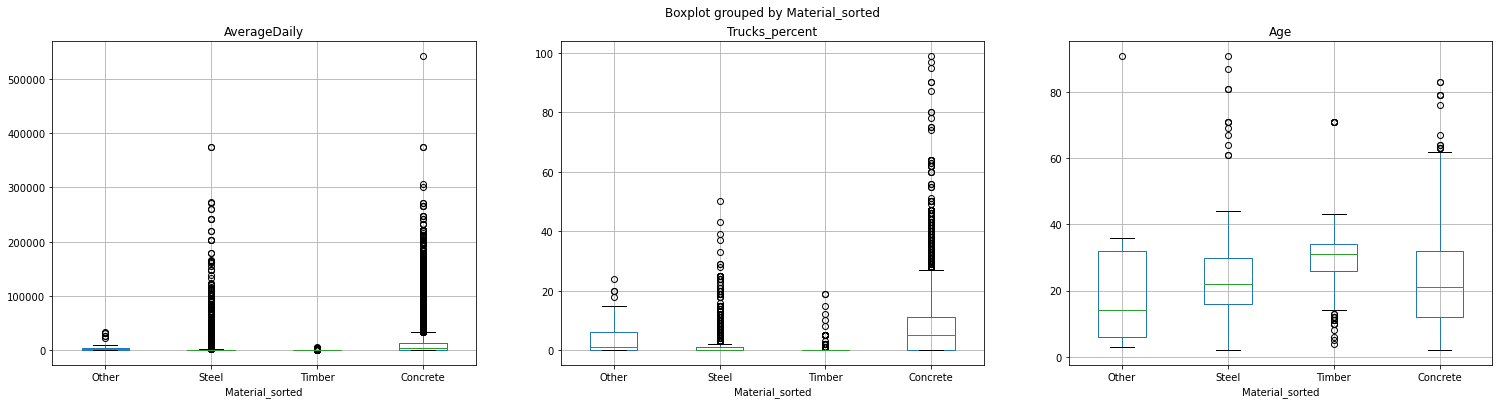

In [12]:
fig, (a1, a2, a3) = plt.subplots(1,3, figsize=(25,6))

bridge_sorted.boxplot(column='AverageDaily', by='Material_sorted', ax=a1)
bridge_sorted.boxplot(column='Trucks_percent', by='Material_sorted', ax=a2)
bridge_sorted.boxplot(column='Age', by='Material_sorted', ax=a3)

+ *The concrete bridge have higher daily traffic and truck percent, and timber bridges ususally have a older age.*

<AxesSubplot:title={'center':'Age'}, xlabel='Design'>

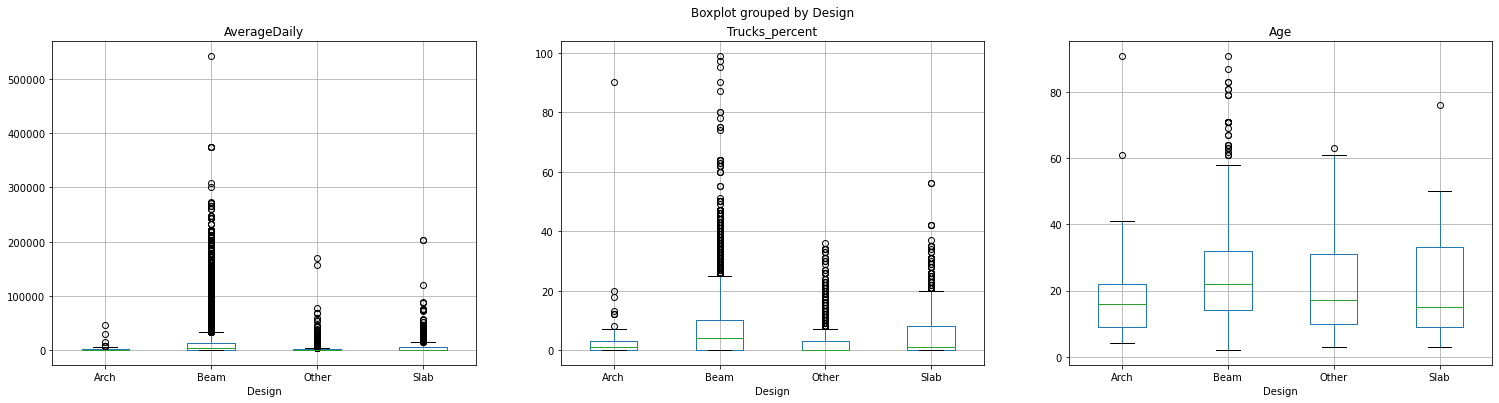

In [13]:
fig, (a4, a5, a6) = plt.subplots(1,3, figsize=(25,6))

bridge_sorted.boxplot(column='AverageDaily', by='Design', ax=a4)
bridge_sorted.boxplot(column='Trucks_percent', by='Design', ax=a5)
bridge_sorted.boxplot(column='Age', by='Design', ax=a6)

+ *The concrete bridge have higher daily traffic, truck percent and an older age.*

**What is next is the relation between continuous predictors.**

In [14]:
bridge_sorted.corr()

,AverageDaily,Trucks_percent,Age,Current_condition
AverageDaily,1.000000,0.083183,-0.017550,0.037194
Trucks_percent,0.083183,1.000000,0.012280,0.085419
Age,-0.017550,0.012280,1.000000,-0.535066
Current_condition,0.037194,0.085419,-0.535066,1.000000


+ *There is a small positive correlation between average traffic volume and the proportion of lorries, but basicly no correlation between ages and rest of two predictors.*
+ *By the way, we find the age has an relatively obvious impact on a bridge' condition.*

**Also, the relation between categorical predictors.**

In [15]:
des_and_mat = pd.crosstab(bridge_sorted.Design, [bridge_sorted.Material_sorted], normalize='all', margins=True)
des_and_mat.round(4) * 100

Material_sorted,Other,Steel,Timber,Concrete,All
Design,,,,,
Arch,0.04,0.15,0.00,0.21,0.39
Beam,0.00,16.23,1.75,71.14,89.12
Other,0.17,1.36,0.00,3.70,5.24
Slab,0.00,0.00,0.00,5.25,5.25
All,0.21,17.74,1.75,80.30,100.00


+ *All slab bridges are made of concrete, and all timver bridges are in shape of beam.*
+ *And most of rest groups are composed by concrete bridge or in shape of beam, either.*

In [16]:
mat_by_des = pd.crosstab(bridge_sorted.Design, [bridge_sorted.Material_sorted], normalize='index')
mat_by_des.round(4) * 100

Material_sorted,Other,Steel,Timber,Concrete
Design,,,,
Arch,8.97,38.46,0.00,52.56
Beam,0.00,18.21,1.97,79.82
Other,3.26,26.01,0.00,70.73
Slab,0.00,0.00,0.00,100.00


+ *And arch bridges have a higher propotion of component in steel and other material, though a lower propotion of component in concrete.*

In [17]:
des_by_mat = pd.crosstab(bridge_sorted.Material_sorted, [bridge_sorted.Design], normalize='index')
des_by_mat.round(4) * 100

Design,Arch,Beam,Other,Slab
Material_sorted,,,,
Other,17.07,0.00,82.93,0.00
Steel,0.85,91.48,7.67,0.00
Timber,0.00,100.00,0.00,0.00
Concrete,0.26,88.59,4.61,6.54


+ *And conctere bridges have a higher propotion of component with a shape of beam, then is the other shape and arch, which is similar with steel bridges.*
+ *And the bridges with other material is in the shape of eitehr arch or undefined (mostly undifined).*

**After that, we will research in the relation between continuous predictors and target variable.**

<AxesSubplot:xlabel='Age', ylabel='Current_condition'>

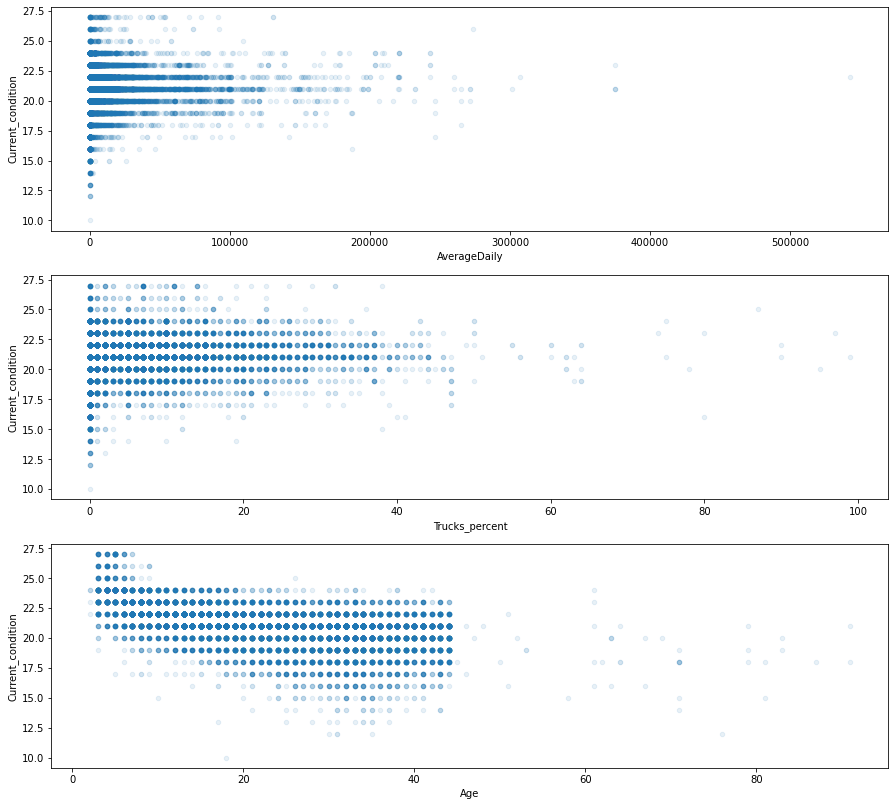

In [18]:
fig, (a6, a7, a8) = plt.subplots(3,1, figsize=(15,14))

bridge_sorted.plot(ax=a6, kind='scatter', x='AverageDaily', y='Current_condition', alpha= 0.1)
bridge_sorted.plot(ax=a7, kind='scatter', x='Trucks_percent', y='Current_condition', alpha= 0.1)
bridge_sorted.plot(ax=a8, kind='scatter', x='Age', y='Current_condition', alpha= 0.1)

+ *In the first two plots, the current conditions are approximately distributed in normal distribution, so it is hard to say that there is an certain correlation between the average daily traffic and bridges' conditions, or between the percent of traffic made up of trucks and bridges' conditions. Meanwhile, we see a gathering around 21 in scores of condition.*
+ *However, in the third plot, it is easy to find that there is a severe decrease in bridge condition' scores for the first 9 years, and it will keep a downtrend in next decades, so it seem they are negativelt related.*

**Furthermore， we may have a look at the relations between continuous predictors and  target variable.**

<AxesSubplot:title={'center':'Current_condition'}, xlabel='Design'>

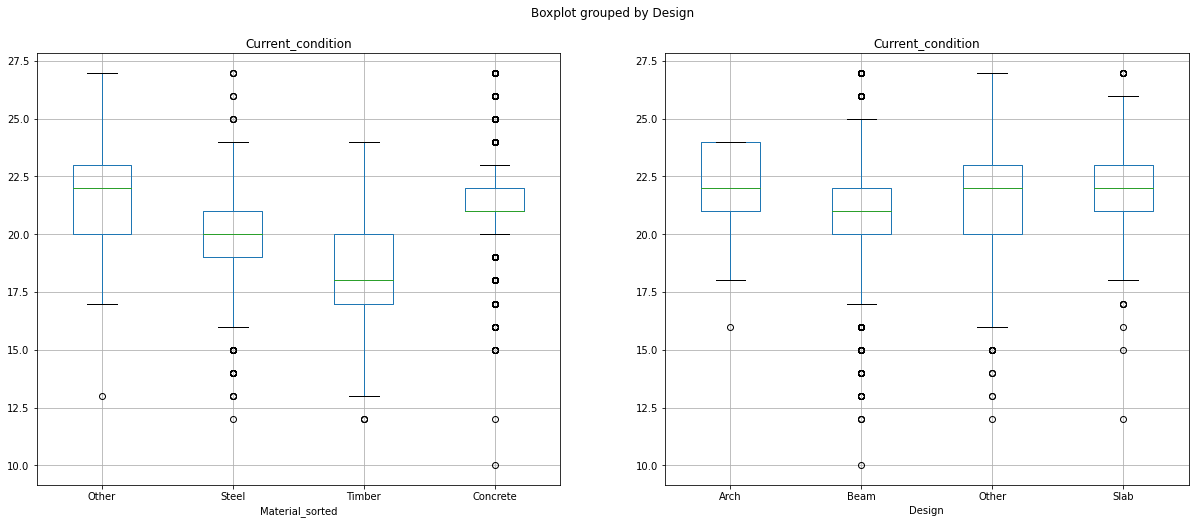

In [19]:
fig, (a9, a10) = plt.subplots(1,2, figsize=(20,8))

bridge_sorted.boxplot(column='Current_condition', by='Material_sorted', ax=a9)
bridge_sorted.boxplot(column='Current_condition', by='Design', ax=a10)

+ *From the first table, it shows that, except for sepcial material, three types of majorities' maximum are close, but minimum vary a lot, including a lowest mean value in 'Timber' group. Therefore, it demostrates that the bridges made of timber mostly remain in the worst conditions.*
+ *From the second table, the variances bewteen beam bridges is largest and arch brigdes are more stable.*

### Section 3: Regression Modelling

#### Section 3.A. Construct linear regression

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

**Transform categorical variables without using reference encoding.**

In [21]:
Mat_d = pd.get_dummies(bridge_sorted.Material_sorted)
Des_d = pd.get_dummies(bridge_sorted.Design)

**And set three predictor variables as X, and target varible, 'Current condition', as y.**

In [22]:
y = bridge_sorted.Current_condition 
X = np.column_stack((bridge_sorted.AverageDaily,bridge_sorted.Trucks_percent,bridge_sorted.Age,Mat_d.Concrete,Mat_d.Other,Mat_d.Steel,Mat_d.Timber,Des_d.Arch,Des_d.Beam,Des_d.Other,Des_d.Slab))
reg = LinearRegression().fit(X, y)

#### Section 3.B.  R2 coefficient of determination

In [23]:
print('The R2 coefficient of determination is %4.3f' % reg.score(X, y))

The R2 coefficient of determination is 0.472


+ *The value tell us that there are 47.2% of true sample could be found on regression line.*

#### Section 3.C. The distribution of residuals

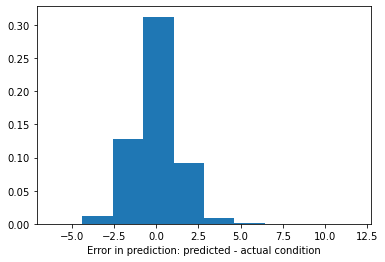

In [24]:
y_hat = reg.predict(X)

fig, a1 = plt.subplots(1, 1)
residuals = y_hat - y
a1.hist(residuals, bins=10, density=True)
_ = a1.set_xlabel('Error in prediction: predicted - actual condition')

+ *From the plot, we can see a symmertrical distribution, it means that the regression model matched the data relation properly.*

#### Section 3.D.  Compare the influence of the different predictors

In [25]:
print('The intercept is %4.1f' % reg.intercept_)
print('The regression coefficients are:', reg.coef_)

The intercept is 22.2
The regression coefficients are: [-1.34797588e-06 -4.63823382e-03 -7.66548311e-02  1.26159193e+00
  8.50519421e-01 -5.19129292e-01 -1.59298206e+00  6.97507172e-01
 -2.52588400e-01 -2.59014436e-01 -1.85904336e-01]


1. *We found that the change of average daily traffic have no clear effects on bridges' current condition, the score will decline 0.6 for every one hundred thousand average use per day.*
2. *And the regression model shows that, from the score of 22.2, each year the age growing, the condition of bridge is predicted to lost 0.08 point, which is a negative relation as we initially guessed. Also, the change of Age has most notable effects on bridges' condition.*
3. *Similarly, every percent increasing in the portion of lorries may cause the condition score reducing 0.005.*
4. *When we are comparing the influence of different kinds of material, from four coefficients, the concrete is the most durable(around 1.26), then is steel and timber(-0.52 and -1.59 respectively).
5. *Nevertheless, when we look at the design, the arch bridge mean a +0.70 score in condition prediction, and the beam bridge mean a -0.25 score, and the slab bridge mean a -0.19 score.

#### Section 3.E.  Final conclusions and suggestions for further analysis

+ *To conclude, the current condition of a bridge could be calculated by a formula, whose rank is approximately equal to $$22.2 + 0.08*Age- 0.005*TrucksPercent  - 0.6*AverageDaily/100000 + \alpha + \beta$$ Remark: the $\alpha$ is the coefficients corresponding to its material, and the $\beta$ corresponding to its design.*
+ *For further analysis, we may introduce more varialbles to see their corelations and the effect on current conditions.*